Importing the Labiries

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = fetch_california_housing(as_frame=True)
X, y = data.data, data.target

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Input, Hidden_1, Hidden_2, Output Layers

In [5]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  
    layers.Dense(32, activation='relu'),  
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),     
    layers.Dense(4, activation='relu'), 
    layers.Dense(1)  
])

c:\Users\tejpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error & Mean Absolute Error

In [6]:
model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mae'])

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs=80, 
                    batch_size=16, 
                    validation_split=0.2, 
                    verbose=1)

# Evaluate the Model on Test Data
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# Predict on Test Data
y_pred = model.predict(x_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute R² Score
r2 = r2_score(y_test, y_pred)

# Compute Variance
variance = np.var(y_pred)

# Print Evaluation Metrics
print(f"RMSE: {rmse:.4f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Variance: {variance:.4f}")

Epoch 1/80


826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1425 - mae: 0.2636 - val_loss: 0.2808 - val_mae: 0.3515
Epoch 2/80
805/826 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1314 - mae: 0.2570

In [22]:
predictions = model.predict(x_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


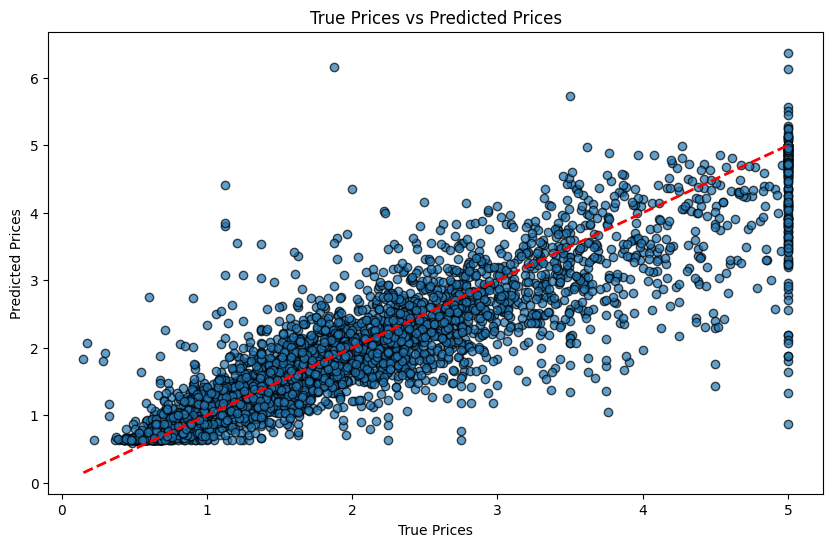

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs Predicted Prices")
plt.show()

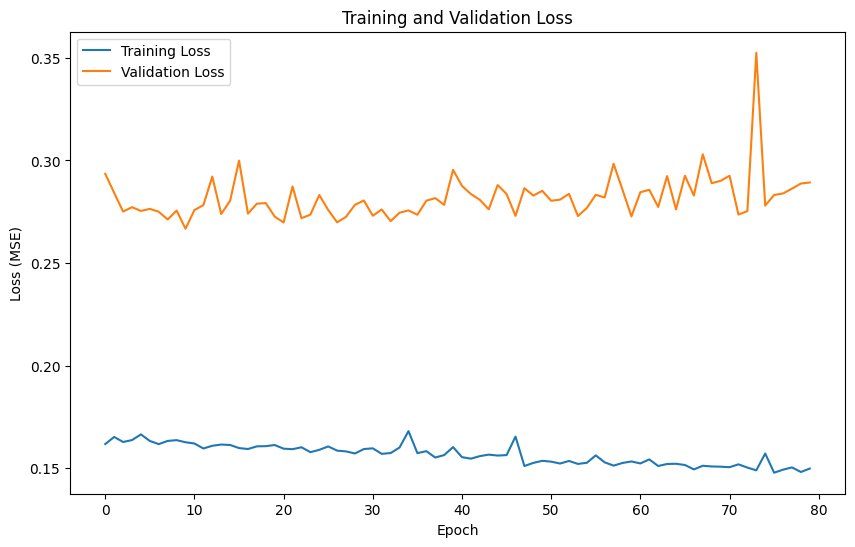

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()